<a href="https://colab.research.google.com/github/toberoi05/BaseballResearch/blob/main/BaseballResearchCode_with_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import statistics as st 
import numpy as np
import random
random.seed(21)
np.random.default_rng(seed = 21)
df = pd.read_csv("/content/drive/MyDrive/statcast/Statcast_2020.csv")
df2 = pd.read_csv("/content/drive/MyDrive/statcast/Statcast_2021.csv")
df3 = pd.read_csv("/content/drive/MyDrive/statcast/Statcast_2019.csv")
df4 = pd.read_csv("/content/drive/MyDrive/statcast/Statcast_2018.csv")
df5 = pd.read_csv("/content/drive/MyDrive/statcast/statcast_2017.csv")
#change to 2 if using testBaseball.csv, 1 elsewise
df = df.iloc[: , 1:]
df2 = df2.iloc[:, 1:]
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False


In [ ]:
df3 = df3.iloc[:,1:]
df4 = df4.iloc[:,1:]
df4.head(20)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FC,2018-10-01,92.2,-1.97,6.26,"Jansen, Kenley",467827,445276,strikeout,swinging_strike,...,5,2,5,2,5,Standard,Standard,164.0,0.004,-0.059
1,FC,2018-10-01,93.0,-1.77,6.30,"Jansen, Kenley",467827,445276,NaN,foul,...,5,2,5,2,5,Standard,Standard,158.0,0.000,0.000
2,FC,2018-10-01,91.6,-1.75,6.22,"Jansen, Kenley",467827,445276,NaN,called_strike,...,5,2,5,2,5,Standard,Standard,151.0,0.000,-0.025
3,SI,2018-10-01,93.1,-1.42,6.19,"Jansen, Kenley",467827,445276,NaN,called_strike,...,5,2,5,2,5,Standard,Standard,197.0,0.000,-0.016
4,FC,2018-10-01,91.4,-1.91,6.26,"Jansen, Kenley",435622,445276,strikeout,called_strike,...,5,2,5,2,5,Standard,Standard,155.0,0.009,-0.148
5,FC,2018-10-01,92.3,-1.62,6.27,"Jansen, Kenley",435622,445276,NaN,foul,...,5,2,5,2,5,Standard,Standard,154.0,0.000,0.000
6,FC,2018-10-01,92.7,-1.72,6.41,"Jansen, Kenley",435622,445276,NaN,ball,...,5,2,5,2,5,Standard,Standard,162.0,0.000,0.031
7,FC,2018-10-01,93.3,-2.10,6.24,"Jansen, Kenley",435622,445276,NaN,ball,...,5,2,5,2,5,Standard,Standard,156.0,0.000,0.014
8,FC,2018-10-01,92.3,-1.80,6.19,"Jansen, Kenley",435622,445276,NaN,called_strike,...,5,2,5,2,5,Standard,Standard,156.0,0.000,-0.037
9,FC,2018-10-01,92.6,-1.96,6.25,"Jansen, Kenley",435622,445276,NaN,called_strike,...,5,2,5,2,5,Standard,Standard,153.0,0.000,-0.026


In [ ]:
df5 = df5.iloc[:,1:]
df5.head(20)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FC,2017-10-01,91.9,-1.19,5.99,"Osuna, Roberto",595885,532077,field_out,hit_into_play,...,2,2,1,1,2,Infield shift,Strategic,183.0,-0.044,-0.124
1,FC,2017-10-01,91.8,-1.08,6.18,"Osuna, Roberto",595885,532077,NaN,foul,...,2,2,1,1,2,Infield shift,Strategic,164.0,-0.044,-0.035
2,FF,2017-10-01,94.7,-0.62,6.34,"Osuna, Roberto",595885,532077,NaN,ball,...,2,2,1,1,2,Infield shift,Strategic,189.0,-0.044,0.038
3,CH,2017-10-01,82.8,-0.99,6.06,"Osuna, Roberto",595885,532077,NaN,ball,...,2,2,1,1,2,Infield shift,Strategic,226.0,-0.044,0.020
4,FT,2017-10-01,95.9,-0.89,6.13,"Osuna, Roberto",595885,532077,NaN,ball,...,2,2,1,1,2,Infield shift,Strategic,221.0,-0.044,0.014
5,FF,2017-10-01,96.0,-0.96,6.21,"Osuna, Roberto",595885,532077,NaN,called_strike,...,2,2,1,1,2,Infield shift,Strategic,203.0,-0.044,-0.018
6,FC,2017-10-01,91.3,-0.89,6.10,"Osuna, Roberto",407812,532077,field_out,hit_into_play,...,2,2,1,1,2,Standard,Standard,151.0,-0.064,-0.122
7,FC,2017-10-01,91.0,-0.79,6.38,"Osuna, Roberto",407812,532077,NaN,foul,...,2,2,1,1,2,Standard,Standard,158.0,0.000,0.000
8,FF,2017-10-01,96.7,-0.64,6.26,"Osuna, Roberto",407812,532077,NaN,foul,...,2,2,1,1,2,Standard,Standard,204.0,0.000,0.000
9,FF,2017-10-01,95.6,-0.87,6.16,"Osuna, Roberto",407812,532077,NaN,called_strike,...,2,2,1,1,2,Standard,Standard,212.0,0.000,-0.045


In [ ]:
columnSet2020 = set(list(df.columns))
columnSet2021 = set(list(df2.columns))
columnSet2019 = set(list(df3.columns))
columnSet2018 = set(list(df4.columns))
columnSet2017 = set(list(df5.columns))
print(len(columnSet2017.intersection(columnSet2018)))

for index, i in enumerate(columnSet2019):
  if not i in columnSet2018:
    print(i)

92


In [ ]:
df = df.append(df2,ignore_index=True)
df = df.append(df3,ignore_index = True)
df = df.append(df4,ignore_index = True)
df = df.append(df5,ignore_index = True)
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2020-09-29,98.8,-0.41,6.46,"Fairbanks, Pete",605412,664126,field_out,hit_into_play,...,3,1,3,1,3,Strategic,Standard,198.0,0.034,-0.370
1,FF,2020-09-29,98.7,-0.33,6.62,"Fairbanks, Pete",605412,664126,NaN,ball,...,3,1,3,1,3,Strategic,Standard,189.0,0.003,0.040
2,SL,2020-09-29,89.6,-0.10,6.79,"Fairbanks, Pete",606192,664126,strikeout,called_strike,...,3,1,3,1,3,Infield shift,Standard,58.0,0.053,-0.392
3,FF,2020-09-29,100.4,-0.38,6.50,"Fairbanks, Pete",606192,664126,NaN,foul,...,3,1,3,1,3,Infield shift,Standard,191.0,0.000,-0.102
4,FF,2020-09-29,97.6,-0.18,6.63,"Fairbanks, Pete",606192,664126,NaN,swinging_strike,...,3,1,3,1,3,Infield shift,Standard,191.0,0.000,-0.053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149500,FT,2017-04-02,98.4,-1.23,5.15,"Martínez, Carlos",592178,593372,NaN,called_strike,...,0,0,0,0,0,Standard,Standard,246.0,0.000,-0.060
3149501,SL,2017-04-02,84.6,-1.25,5.39,"Martínez, Carlos",656941,593372,single,hit_into_play,...,0,0,0,0,0,Infield shift,Standard,74.0,-0.036,0.346
3149502,FT,2017-04-02,97.3,-1.32,5.18,"Martínez, Carlos",656941,593372,NaN,ball,...,0,0,0,0,0,Standard,Standard,252.0,0.000,0.050
3149503,FT,2017-04-02,95.9,-1.31,5.48,"Martínez, Carlos",656941,593372,NaN,foul,...,0,0,0,0,0,Standard,Standard,245.0,0.000,-0.046


In [ ]:
df = df.dropna(axis = 1, how = "all")

In [ ]:
#dropping all rows that statcast didnt record for a particular pitcher
df = df.dropna(subset=["pitch_type", "release_speed", "release_pos_x", "release_pos_z", "pitcher", "p_throws", "vx0", "vy0","vz0",
                  "ax","ay","az", "release_spin_rate", "release_extension", "spin_axis", "pfx_x","pfx_z"])
df.reset_index(drop = True, inplace = True)

In [ ]:
from pandas.core.frame import DataFrame
from collections import defaultdict
quantCols = {}
categoricalCols = {}
possiblePitchTypes = []

#summary statistics and some data viewing

def createCategoricalPair(inputList):
  countDict = defaultdict(int)
  for val in inputList:
    countDict[val]+=1
  return dict(countDict)

numDf = pd.DataFrame()
for column in df:
  if(not isfloat(df[column][0]) or (column == "batter" or column == "pitcher")):
    categoricalCols[column] = createCategoricalPair(df[column])
    #how to get label of categorical data (like in pitchtype, it should be "FF":90328, while it only prints 90328 in the dictionary)
  else:
    temp = df[column].to_list()
    summaryStats = [np.nanmean(temp), np.nanmedian(temp), np.nanstd(temp)]
    quantCols[column] = summaryStats
    numDf[column] = df[column]

#print(quantCols)
#print(categoricalCols)
print(categoricalCols.keys())
possiblePitchTypes = categoricalCols["pitch_type"].keys()

possiblePitchTypes = list(possiblePitchTypes)
possibleOutcomeTypes = ["S","B","X"]

print(possiblePitchTypes)
numDf=numDf.dropna(axis = 1, how = "all")

dict_keys(['pitch_type', 'game_date', 'player_name', 'batter', 'pitcher', 'events', 'description', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'bb_type', 'inning_topbot', 'pitch_name', 'if_fielding_alignment', 'of_fielding_alignment'])
['FF', 'SL', 'CH', 'CU', 'SI', 'FC', 'FS', 'KC', 'FA', 'CS', 'KN', 'EP', 'FO', 'SC', 'FT', 'PO']


In [ ]:
#combining events and descriptions columns
#use df.at

events = df["events"]
for index,event in enumerate(events):
  if(pd.isna(event)):
    df.at[index, "events"] = df.at[index, "description"]
df.drop(['description'], inplace=True, axis=1)
df.rename(columns={"events":"description"}, inplace = True)
print(set(df["description"].to_list()))


{'pitchout', 'called_strike', 'fielders_choice_out', 'sac_fly_double_play', 'sac_bunt', 'catcher_interf', 'stolen_base_home', 'hit_by_pitch', 'caught_stealing_2b', 'caught_stealing_home', 'pickoff_caught_stealing_3b', 'wild_pitch', 'grounded_into_double_play', 'bunt_foul_tip', 'passed_ball', 'swinging_pitchout', 'hit_into_play', 'blocked_ball', 'other_out', 'field_out', 'ball', 'caught_stealing_3b', 'runner_double_play', 'pickoff_1b', 'pickoff_2b', 'sac_fly', 'foul', 'field_error', 'swinging_strike_blocked', 'sac_bunt_double_play', 'pickoff_caught_stealing_home', 'missed_bunt', 'stolen_base_2b', 'swinging_strike', 'triple_play', 'foul_bunt', 'game_advisory', 'triple', 'home_run', 'double', 'fielders_choice', 'strikeout', 'double_play', 'pickoff_3b', 'foul_pitchout', 'walk', 'strikeout_double_play', 'force_out', 'foul_tip', 'single', 'pickoff_caught_stealing_2b'}


In [ ]:
print(df["description"])

0                field_out
1                     ball
2                strikeout
3                     foul
4          swinging_strike
                ...       
3092786      called_strike
3092787             single
3092788               ball
3092789               foul
3092790               ball
Name: description, Length: 3092791, dtype: object


In [ ]:
#combining description features
#removing catcher_interf and pickoff events and other_out events and field_error events and pitchout events

#sac_bunt, sac_fly, sac_fly_double_play-> sac_play
#caught_stealing_3b, caught_stealing_2b, caught_stealing_home -> caught_stealing
#fielders_choice_out, fielders_choice -> fielders_choice
#grounded_into_double_play, field_out, force_out, triple_play, double_play -> field_out
#triple, double -> extra_base_hit
#missed_bunt, bunt_foul_tip, foul_bunt -> failed_bunt
##swinging_strike_blocked, swinging_strike, called_strike -> strike
#strikeout_double_play, strikeout -> strikeout
#blocked_ball, ball -> ball

#reducing output by 16 features

In [ ]:
def combineLabels(x):
  if x == "sac_bunt" or x == "sac_fly" or x == "sac_fly_double_play" or x == "sac_bunt_double_play":
    return "sac_play"
  elif x == "caught_stealing_3b" or x == "caught_stealing_2b" or x == "caught_stealing_home":
    return "caught_stealing"
  elif x == "fielders_choice_out" or x == "fielders_choice":
    return "fielders_choice"
  elif x == "grounded_into_double_play" or x == "field_out" or x == "force_out" or x == "triple_play" or x == "double_play":
    return "field_out"
  elif x == "triple" or x == "double":
    return "extra_base_hit"
  elif x == "missed_bunt" or x == "bunt_foul_tip" or x == "foul_bunt":
    return "failed_bunt"
  elif x == "swinging_strike_blocked" or x == "swinging_strike" or x == "called_strike":
    return "strike"
  elif x == "strikeout_double_play" or x == "strikeout":
    return "strikeout"
  elif x == "blocked_ball" or x == "ball" or x == "wild_pitch" or x == "passed_ball":
    return "ball"
  elif x == "stolen_base_2b" or x == "stolen_base_3b":
    return "stolen_base"
  else:
    return x

df["description"] = df["description"].apply(combineLabels)
print(df["description"])
print(len(set(df["description"].to_list())))

#removing the rows with the 5 descriptions

# for index,data in enumerate(df["description"]):
#   if(data == "catcher_interf" or data == "pitchout" or data == "field_error" or data == "other_out" or data == "pickoff_caught_stealing_3b" or data == "pickoff_3b"
#   or data == "pickoff_2b" or data == "pickoff_1b" or data == "game_advisory" or data == "foul_pitchout"):
#     df = df.drop([index])

# df = df.loc[~((df["description"] == "catcher_interf") | (df["description"] == "pitchout") | (df["description"] == "field_error") | (df["description"] == "other_out")
# | (df["description"] == "pickoff_caught_stealing_3b") | (df["description"] == "pickoff_3b") | (df["description"] == "pickoff_2b") | (df["description"] == "pickoff_1b")
# | (df["description"] == "game_advisory") | (df["description"] == "foul_pitchout")) ]

#removing catcher interference for the BAA part of the project
df = df.loc[~((df["description"] == "pitchout") | (df["description"] == "field_error") | (df["description"] == "other_out")
| (df["description"] == "pickoff_caught_stealing_3b") | (df["description"] == "pickoff_3b") | (df["description"] == "pickoff_2b") | (df["description"] == "pickoff_1b")
| (df["description"] == "game_advisory") | (df["description"] == "foul_pitchout") | (df["description"] == "pickoff_caught_stealing_home") | (df["description"] == "swinging_pitchout")| (df["description"] == "pickoff_caught_stealing_2b")) ]

print(len(df))

0          field_out
1               ball
2          strikeout
3               foul
4             strike
             ...    
3092786       strike
3092787       single
3092788         ball
3092789         foul
3092790         ball
Name: description, Length: 3092791, dtype: object
32
3086598


In [ ]:
print(len(set(df["description"].to_list())))

20


In [ ]:
#deleting all rows that contain pitchers who have less than x number of pitches

df.reset_index(drop = True, inplace = True)

x = 1001
pitcherDict = categoricalCols["pitcher"]
invalidPitchers = set()

for key in pitcherDict:
  if pitcherDict[key] < x:
    invalidPitchers.add(key)
print(len(invalidPitchers))

df = df.loc[(~df["pitcher"].isin(invalidPitchers))]
# for index,data in enumerate(df["pitcher"]):
#   if(data in invalidPitchers):
#     df = df.drop([index])
print(len(df))

796
2835562


In [ ]:
print(len(set(df["pitcher"].to_list())))

777


In [ ]:
#combine pitch types

def combinePitches(x):
  if x in  ['FF', 'SI', 'FC', 'FT']:
    return 'FF'
  elif x in ['CH', 'CU', 'SL']:
    return x
  else:
     return 'other_offspeed'

df["pitch_type"] = df["pitch_type"].apply(combinePitches)
df = df.loc[~(df["pitch_type"] == 'PO')]
print(len(set(df["pitch_type"].to_list())))
print(set(df["pitch_type"].to_list()))

5
{'FF', 'other_offspeed', 'CU', 'SL', 'CH'}


In [ ]:
#combine zone types (high_zone -> 1-6,11,12, low_zone -> 7-9,13,14)
def combineZones(x):
  if x in  [1,2,3,4,5,6,11,12]:
    return 'high_zone'
  else:
    return 'low_zone'

df["zone"] = df["zone"].apply(combineZones)
print(len(set(df["zone"].to_list())))
print(set(df["zone"].to_list()))

2
{'high_zone', 'low_zone'}


In [ ]:
#combine throwing arms (0-> right, 1-> left)
def convArmToBin(x):
  if x== 'R':
    return 0
  else:
    return 1

df["p_throws"] = df["p_throws"].apply(convArmToBin)
print(len(set(df["p_throws"].to_list())))
print(set(df["p_throws"].to_list()))

2
{0, 1}


In [ ]:
#initial features: pitch_type, release_speed, release_pos_x, release_pos_y, release_pos_z, pitcher, p_throws, vx0, vy0, vz0, ax, ay,az, 
#effective_speed, release_spin_rate, release_extension, spin_axis

pitchOnlyDf = df[["pitch_type", "release_speed", "release_pos_x", "release_pos_z", "pitcher", "p_throws", "vx0", "vy0","vz0",
                  "ax","ay","az", "release_spin_rate", "release_extension", "spin_axis", "pfx_x","pfx_z", "zone"]]
distinctIds = set(pitchOnlyDf["pitcher"])
print(len(distinctIds))

pitchOnlyDf



777


,pitch_type,release_speed,release_pos_x,release_pos_z,pitcher,p_throws,vx0,vy0,vz0,ax,ay,az,release_spin_rate,release_extension,spin_axis,pfx_x,pfx_z,zone
0,FF,98.8,-0.41,6.46,664126,0,4.460832,-143.454867,-10.667977,-3.160781,33.818081,-7.243571,2483.0,7.2,198.0,-0.15,1.64,low_zone
1,FF,98.7,-0.33,6.62,664126,0,5.223787,-143.573962,-6.513184,-0.414780,35.625773,-7.037934,2522.0,7.2,189.0,0.06,1.72,high_zone
2,SL,89.6,-0.10,6.79,664126,0,0.149483,-130.544812,-3.575817,3.724979,27.234020,-36.772543,2537.0,6.9,58.0,0.33,-0.45,high_zone
3,FF,100.4,-0.38,6.50,664126,0,2.751270,-145.948969,-9.923122,-4.526442,35.628117,-7.855065,2469.0,7.1,191.0,-0.27,1.55,high_zone
4,FF,97.6,-0.18,6.63,664126,0,1.329177,-142.026642,-6.164797,-3.404690,33.459882,-9.755406,2339.0,7.1,191.0,-0.23,1.57,high_zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086593,FF,98.4,-1.23,5.15,593372,0,7.179546,-142.581131,-4.918857,-18.573869,33.201434,-22.306689,2066.0,5.5,246.0,-1.28,0.68,low_zone
3086594,SL,84.6,-1.25,5.39,593372,0,1.149067,-122.821485,-1.341576,10.331882,24.074272,-33.798336,2194.0,4.7,74.0,1.10,-0.17,low_zone
3086595,FF,97.3,-1.32,5.18,593372,0,6.353246,-141.192269,-5.944415,-18.881798,30.681296,-23.942620,2015.0,5.6,252.0,-1.34,0.55,low_zone
3086596,FF,95.9,-1.31,5.48,593372,0,5.288673,-139.217803,-4.486852,-21.233172,30.974374,-20.788933,2144.0,5.5,245.0,-1.59,0.84,low_zone


In [ ]:
print(pitchOnlyDf["p_throws"].isna().sum())
print(df.loc[df["pitcher"] == 664126]["player_name"])
print(pitcherDict[664126])


0
0          Fairbanks, Pete
1          Fairbanks, Pete
2          Fairbanks, Pete
3          Fairbanks, Pete
4          Fairbanks, Pete
                ...       
1398812    Fairbanks, Pete
1398813    Fairbanks, Pete
1398814    Fairbanks, Pete
1398815    Fairbanks, Pete
1398816    Fairbanks, Pete
Name: player_name, Length: 1621, dtype: object
1628


In [ ]:
groupedDf = df.groupby("pitcher")

#computing BAA for training data of each pitcherID

onBaseDict = {}
totalAtBatsDict = {}
for index, i in groupedDf:
  onBase = 0
  total = 0
  currBatter = 0
  i = i[["batter","description"]]
  for row in i.iterrows():

    if(currBatter != row[1]["batter"]):
      currBatter = row[1]["batter"]
      desc = row[1]["description"]

      if index not in onBaseDict:
        if desc == "single" or desc == "double" or desc == "triple" or desc == "home_run":
          onBaseDict[index] = 1
        else:
          onBaseDict[index] = 0

        if desc == "walk" or desc == "hit_by_pitch" or desc == "sac_play" or desc == "catcher_interf":
          totalAtBatsDict[index] = 0
        else:
          totalAtBatsDict[index] = 1
        
      else:
        if desc == "walk" or desc == "hit_by_pitch" or desc == "sac_play" or desc == "catcher_interf":
          pass
        else:
          totalAtBatsDict[index]+=1

        if desc == "single" or desc == "double" or desc == "triple" or desc == "home_run":
          onBaseDict[index] += 1


  

In [ ]:
print(set(df["description"].to_list()))

#use "outs_when_up" column to detect innings per pitcher

{'catcher_interf', 'stolen_base_home', 'hit_by_pitch', 'extra_base_hit', 'hit_into_play', 'strike', 'field_out', 'ball', 'runner_double_play', 'foul', 'stolen_base', 'caught_stealing', 'home_run', 'fielders_choice', 'strikeout', 'failed_bunt', 'sac_play', 'walk', 'foul_tip', 'single'}


In [ ]:
#Compute WHIP (walks + hits/ innings pitched) for each pitcher (do outs/3 to compute # of innings pitched)           

groupedDf = df.groupby("pitcher")

hitWalkDict = {}
totalInningsDict = {}
whipDict = {}
for index, i in groupedDf:

  totalOuts = 0
  currBatter = 0
  i = i[["batter","description", "outs_when_up"]]
  currOuts = 2
  for row in i.iterrows():

    if(currBatter != row[1]["batter"]):
      currBatter = row[1]["batter"]
      desc = row[1]["description"]

      if index not in hitWalkDict:
        if desc == "single" or desc == "double" or desc == "triple" or desc == "home_run" or desc == "walk":
          hitWalkDict[index] = 1
        else:
          hitWalkDict[index] = 0
        if row[1]["outs_when_up"] != currOuts:
          currOuts = row[1]["outs_when_up"]
          totalOuts+=1
        
      else:
        if desc == "single" or desc == "double" or desc == "triple" or desc == "home_run" or desc == "walk":
          hitWalkDict[index] += 1

        if row[1]["outs_when_up"] != currOuts:
          currOuts = row[1]["outs_when_up"]
          totalOuts+=1

  totalInningsDict[index] = totalOuts/3

  whipDict[index] = hitWalkDict[index] / totalInningsDict[index]




  

In [ ]:
#Compute FIP(https://www.lookoutlanding.com/2017/4/4/15180804/an-idiots-guide-advanced-statistics-fip-era)
#Formula: (13*HR - 3*(BB + HBP) - 2*K)/IP + C, let C = 3.18

groupedDf = df.groupby("pitcher")

walkHBPDict = {}
HRDict = {}
KDict = {}
totalInningsDict2 = {}
FIPDict = {}

C = 3.18 # averaged out the C values from 2017-2021

for index, i in groupedDf:
  totalOuts = 0
  currBatter = 0
  i = i[["batter","description", "outs_when_up"]]
  currOuts = 2
  walkHBPDict[index] = 0
  HRDict[index] = 0
  KDict[index] = 0

  for row in i.iterrows():

    if(currBatter != row[1]["batter"]):
      currBatter = row[1]["batter"]
      desc = row[1]["description"]

      if row[1]["outs_when_up"] != currOuts:
        currOuts = row[1]["outs_when_up"]
        totalOuts+=1
        
      if desc == "home_run":
        HRDict[index] += 1
      if desc == "strikeout":
        KDict[index] += 1
      if desc == "ball" or desc == "hit_by_pitch":
        walkHBPDict[index] += 1

  totalInningsDict2[index] = totalOuts/3

  FIPDict[index] = (13*HRDict[index] + 3*walkHBPDict[index] - 2 * KDict[index]) / totalInningsDict[index] + C



In [ ]:
#testing FIP


print(min(FIPDict.values()))
print(max(FIPDict.values()))
print(max(totalInningsDict2.values()))
print(min(totalInningsDict2.values()))

print(FIPDict[664126])
print(totalInningsDict2[664126])

1.1872992700729927
6.7865573770491805
857.0
51.333333333333336
2.270909090909091
88.0


In [ ]:
onBaseFreq = {}

#68-344 at-bats

for id in distinctIds:
  onBaseFreq[id] = onBaseDict[id]/totalAtBatsDict[id]
print(min(onBaseFreq.values()))
print(max(onBaseFreq.values()))
print(max(totalAtBatsDict.values()))
print(min(totalAtBatsDict.values()))

print(onBaseFreq[664126])
print(totalAtBatsDict[664126])

0.105
0.2717391304347826
3232
194
0.19390581717451524
361


In [ ]:
#testing WHIP

print(min(whipDict.values()))
print(max(whipDict.values()))
print(max(totalInningsDict.values()))
print(min(totalInningsDict.values()))

print(whipDict[664126])
print(totalInningsDict[664126])

0.7422145328719724
1.7377049180327868
857.0
51.333333333333336
1.2840909090909092
88.0


In [ ]:
#returns specified output metric (can change the dictionary to either the FIP, BAA, or WHIP)

def computeOBP(pitcherID, df):
  return onBaseFreq[pitcherID]

In [ ]:
# Percentage of balls/strikes and compare that with OBP

groupedDf = df.groupby("pitcher")


ballFreq = {}
for index, i in groupedDf:
  balls = 0
  total = 0
  total = len(i)
  balls = len(i.loc[(i["description"] == "ball")])

  ballFreq[index] = balls/total
print(ballFreq[664126])

0.3405305367057372


In [ ]:
groupedDf = df.groupby("pitcher")


avgVelocity = {}
for index, i in groupedDf:
  avgVelocity[index] = i["release_speed"].mean().mean()
print(avgVelocity[664126])

92.86354102405922


In [ ]:
print(ballFreq[664126])
print(whipDict[664126])
print(avgVelocity[664126])

ballList = []
onBaseList = []
avgVelocityList = []

for key in ballFreq.keys():
  ballList.append(ballFreq[key])
  onBaseList.append(whipDict[key])
  avgVelocityList.append(avgVelocity[key])

print(ballList[0], onBaseList[0], avgVelocityList[0])

0.3405305367057372
1.2840909090909092
92.86354102405922
0.3175239367624137 1.130688448074679 86.42032954798486


In [ ]:
import plotly.express as px

fig = px.scatter(x = ballList, y=onBaseList, trendline="ols", labels={'x':'ballFrequency', 'y':'WHIP'}, width = 800, height = 600)
fig.show()

In [ ]:
fig = px.scatter(x = avgVelocityList, y=onBaseList, trendline="ols")
fig.show()

In [ ]:
#correlation between balls and on base percentage
print(np.corrcoef(ballList,onBaseList))

[[1.         0.58870748]
 [0.58870748 1.        ]]


In [ ]:
from sklearn.linear_model import LinearRegression

#linear regression with balls frequency feature


X = np.reshape(ballList,((-1,1)))
y = np.reshape(onBaseList,((-1,1)))
reg = LinearRegression().fit(X, y)

pred = reg.predict(X)

valid = 0
total = len(pred)
for index, val in enumerate(pred):
  if abs(y[index]-val) < 0.1:
    print(val, y[index])
    valid+=1

print(valid/total)


[1.08086953] [1.12406328]
[1.17524136] [1.20833333]
[1.23384236] [1.27405858]
[0.95096907] [0.86455331]
[1.03562012] [0.97350993]
[1.14855642] [1.0710631]
[1.27172037] [1.24857955]
[1.22666192] [1.14285714]
[1.1477431] [1.11637931]
[1.14308135] [1.1750547]
[1.31111826] [1.31141869]
[1.26829102] [1.26869159]
[1.10858998] [1.12952799]
[1.16173614] [1.07002188]
[1.24193751] [1.16853933]
[1.12173357] [1.03392857]
[1.20844933] [1.1682243]
[1.13652006] [1.06367583]
[0.87935902] [0.85817308]
[1.14541775] [1.09777348]
[1.15258006] [1.24703088]
[1.11365514] [1.16262976]
[1.129765] [1.2218845]
[0.96048303] [0.98954931]
[0.85393572] [0.90967742]
[1.25409264] [1.156283]
[1.2202113] [1.16475645]
[1.23491569] [1.24885636]
[1.22216908] [1.2962963]
[0.76225251] [0.82622951]
[1.2172003] [1.17812759]
[1.20878393] [1.17248908]
[1.28396373] [1.24630542]
[1.33498268] [1.3297546]
[1.24373299] [1.20166898]
[1.09470721] [1.12687813]
[1.01181326] [1.10301954]
[0.98493488] [1.01214575]
[1.12458883] [1.0746988]


In [ ]:
def computeBallFreq(pitcherID, df):
  total = len(df)
  balls = len(df.loc[(df["description"] == "ball")])

  return balls/total

In [ ]:
from scipy import stats 

def computeEntropy(pitcherID, pitchTypeFrequencies):
  return stats.entropy(pitchTypeFrequencies, base = 2)


In [ ]:
#60% is baseline

In [ ]:
from sklearn.utils.validation import indexable
#Torch Dataset, input = getTrainingData(), output = output
import torch
import torch.nn as nn
import torch.nn.functional as func
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms

torch.manual_seed(21)
class PitcherDataset(Dataset):
  def __init__(self, x, y):
    super().__init__()
    self.x = torch.FloatTensor(x)
    self.y = torch.FloatTensor(y)
  def __len__(self):
    return len(self.y)
  def __getitem__(self, idx):
    tempList = self.x
    transformedList = []
    try:
      sc = StandardScaler()
      transformedList = sc.fit_transform(tempList)
    except:
      tempList = tempList.view(-1,1)
      sc = StandardScaler()
      transformedList = sc.fit_transform(tempList)

    return torch.FloatTensor(transformedList[idx]), self.y[idx]

In [ ]:
#distinctPitchers is the pitcherList with all the pitchers

distinctPitchers = list(distinctIds)

In [ ]:
#Do some data-preprocessing to prepare for regression training

#use pitchOnlyDf

#use previously defined BaseballDataset and the DataLoaders of pytorch

#Use the 5th percentile and the 95th percentile of each feature as the input features

#Take training input by using 1000 pitches

import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from scipy import stats 

def convToOneHot(columnList, df):
  y = pd.get_dummies(df, columns = columnList)
  return y

newDf = convToOneHot(['pitch_type', "zone"], df)

#uses selected features
pitchOnlyDfFeatures=pitchOnlyDf[['pitch_type','p_throws','zone','release_speed', 'release_spin_rate', "release_extension"]]
# pitchOnlyDfFeatures = pitchOnlyDf[["pitch_type", "release_speed", "release_pos_x", "release_pos_z", "p_throws", "vx0", "vy0","vz0",
#                   "ax","ay","az", "release_spin_rate", "release_extension", "spin_axis", "pfx_x", "pfx_z"]]

pitchOneHotDf = convToOneHot(["pitch_type","zone"], pitchOnlyDfFeatures)

groupedPitchers = newDf.groupby("pitcher")

inputFeatures = pitchOneHotDf.columns.to_list()

    
def getCutoff(percent, totalLen):
  #return math.floor(percent * totalLen)
  return 1000

def getTrainingData(percent, specificPitcherID, specificPitcherDf, inputFeatures):
  totalLen = len(specificPitcherDf)
  cutoff = getCutoff(percent,totalLen)

  trainDf = specificPitcherDf.head(cutoff)

  pitcherData = []
  entropyData = []
  for column in trainDf[inputFeatures]:
    tempList = trainDf[column].to_list()
    # sc = StandardScaler()
    # transformedList = sc.fit_transform(np.reshape(tempList,(-1,1)))
    # transformedList = transformedList.flatten()

    transformedList = tempList

    if column in ['zone_high_zone','zone_low_zone','zone_1.0', 'zone_2.0', 'zone_3.0', 'zone_4.0', 'zone_5.0', 'zone_6.0', 'zone_7.0', 'zone_8.0', 'zone_9.0', 'zone_11.0', 'zone_12.0', 'zone_13.0', 'zone_14.0', 
    'pitch_type_CH', 'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA','pitch_type_other_offspeed', 'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC', 
    'pitch_type_SI', 'pitch_type_SL']:
      pitcherData.append(sum(transformedList)/len(transformedList))
    else:
      if column == "p_throws":
        pitcherData.append(float(stats.mode(transformedList).mode[0]))
      else:
        pitcherData.append(np.percentile(transformedList, 5))
        pitcherData.append(np.percentile(transformedList, 95))

    if column in ['pitch_type_CH', 'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA','pitch_type_other_offspeed', 'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC', 
    'pitch_type_SI', 'pitch_type_SL']:
      entropyData.append(sum(transformedList)/len(transformedList))

  pitcherData.append(computeBallFreq(specificPitcherID,trainDf))
  pitcherOutput = computeOBP(specificPitcherID, trainDf)

  pitchTypeEntropy = computeEntropy(specificPitcherID, entropyData)
  pitcherData.append(pitchTypeEntropy)
  # pitcherData.append(whipDict[specificPitcherID])

  return pitcherData, [pitcherOutput]


def getValidationData(percent, specificPitcherID, specificPitcherDf, inputFeatures):
  totalLen = len(specificPitcherDf)
  cutoff = getCutoff(percent,totalLen)

  # trainDf = specificPitcherDf.head(2 * cutoff)
  # trainDf = trainDf.iloc[500:1000,:]

  trainDf = specificPitcherDf.head(cutoff)

  pitcherData = []
  entropyData = []
  for column in trainDf[inputFeatures]:
    tempList = trainDf[column].to_list()
    # sc = StandardScaler()
    # transformedList = sc.fit_transform(np.reshape(tempList,(-1,1)))
    # transformedList = transformedList.flatten()

    transformedList = tempList

    if column in ['zone_high_zone','zone_low_zone','zone_1.0', 'zone_2.0', 'zone_3.0', 'zone_4.0', 'zone_5.0', 'zone_6.0', 'zone_7.0', 'zone_8.0', 'zone_9.0', 'zone_11.0', 'zone_12.0', 'zone_13.0', 'zone_14.0', 
    'pitch_type_CH', 'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA','pitch_type_other_offspeed', 'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC', 
    'pitch_type_SI', 'pitch_type_SL']:
      pitcherData.append(sum(transformedList)/len(transformedList))
    else:
      if column == "p_throws":
        pitcherData.append(float(stats.mode(transformedList).mode[0]))
      else:
        pitcherData.append(np.percentile(transformedList, 5))
        pitcherData.append(np.percentile(transformedList, 95))
    if column in ['pitch_type_CH', 'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA','pitch_type_other_offspeed', 'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC', 
    'pitch_type_SI', 'pitch_type_SL']:
      entropyData.append(sum(transformedList)/len(transformedList))
  pitcherData.append(computeBallFreq(specificPitcherID,trainDf))
  pitcherOutput = computeOBP(specificPitcherID, trainDf)
  pitchTypeEntropy = computeEntropy(specificPitcherID, entropyData)

  pitcherData.append(pitchTypeEntropy)
  # pitcherData.append(whipDict[specificPitcherID])
  
  return pitcherData, [pitcherOutput]

x = []
y = []


# for index, i in groupedPitchers:
#   xTrain,yTrain = getTrainingData(1,index,i, inputFeatures)
#   x.append(list(xTrain))
#   y.append(yTrain)

distinctTrainingPitchers, distinctValidationPitchers = tts(distinctPitchers, test_size = 0.25, random_state = 42)
for id in distinctTrainingPitchers:
  i = groupedPitchers.get_group(id)
  xTrain,yTrain = getTrainingData(1,id,i, inputFeatures)
  x.append(list(xTrain))
  y.append(yTrain)

print(inputFeatures)


['p_throws', 'release_speed', 'release_spin_rate', 'release_extension', 'pitch_type_CH', 'pitch_type_CU', 'pitch_type_FF', 'pitch_type_SL', 'pitch_type_other_offspeed', 'zone_high_zone', 'zone_low_zone']


In [ ]:
print(distinctTrainingPitchers[345])

641941


In [ ]:
#getting rid of nan values

print(np.count_nonzero(np.isnan(x)))
x = np.nan_to_num(x, nan=-1)
print(np.count_nonzero(np.isnan(x)))

0
0


In [ ]:
#Validation set
xVal = []
yVal = []

sc = StandardScaler()

# for index, i in groupedPitchers:
#   xv,yv = getValidationData(1,index,i, inputFeatures)
#   xVal.append(list(xv))
#   yVal.append(yv)

for id in distinctValidationPitchers:
  i = groupedPitchers.get_group(id)
  xv,yv = getValidationData(1,id,i, inputFeatures)
  xVal.append(list(xv))
  yVal.append(yv)


In [ ]:
#getting rid of nan values

print(np.count_nonzero(np.isnan(xVal)))
xVal = np.nan_to_num(xVal, nan=-1)
print(np.count_nonzero(np.isnan(xVal)))

0
0


In [ ]:
print(x)

[[ 0.         77.3        95.7        ...  0.461       0.319
   1.65658201]
 [ 0.         77.595      93.8        ...  0.522       0.35
   0.96005937]
 [ 0.         79.8        94.1        ...  0.571       0.362
   1.58315831]
 ...
 [ 1.         81.1        92.5        ...  0.656       0.365
   0.98968522]
 [ 0.         83.3        96.3        ...  0.551       0.353
   1.09647643]
 [ 0.         85.5        97.8        ...  0.41        0.352
   1.25342931]]


In [ ]:
print(xVal)

[[ 0.         81.5        94.7        ...  0.636       0.331
   1.44638214]
 [ 0.         79.995      94.6        ...  0.435       0.298
   1.45252885]
 [ 0.         79.5        94.9        ...  0.529       0.32
   1.52228023]
 ...
 [ 0.         78.495      98.5        ...  0.438       0.296
   1.46210403]
 [ 0.         80.5        96.         ...  0.601       0.336
   1.8399421 ]
 [ 0.         84.2        99.105      ...  0.641       0.354
   1.51252139]]


In [ ]:
train_data = PitcherDataset(x,y)
val_data = PitcherDataset(xVal,yVal)
batch_size = 4
trainLoader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
valLoader = DataLoader(dataset = val_data, batch_size = batch_size, shuffle = False)
print(train_data.__getitem__(0))
print(val_data.__getitem__(0))

(tensor([-0.5840, -0.6887,  0.4443,  0.0956,  3.2888, -0.3871, -0.5817, -0.3310,
         1.4982, -0.4073, -0.2505, -0.3885,  0.3681, -0.3681, -1.0665,  1.1400]), tensor([0.1939]))
(tensor([-0.6347,  0.4584,  0.0421, -0.4586, -0.0927, -0.6127, -1.2857,  0.2781,
        -0.7923, -1.8747,  2.0537, -0.3747, -1.6432,  1.6432, -0.4686,  0.3884]), tensor([0.1932]))


In [ ]:
initialSize = 16
outputSize = 1
#ideal model so far

class NNSimpleReg2(nn.Module):
  def __init__(self, initialSize, outputSize,a = 8,b = 6):
    super(NNSimpleReg2,self).__init__()
    self.hidden1 = self.Linear(initialSize,a)
    self.dropout1 = nn.Dropout(p = 0.3)
    self.hidden2 = self.Linear(a,b)
    self.dropout2 = nn.Dropout(p = 0.3)
    self.layer2 = self.Linear(b,outputSize)

  def forward(self,input):
    output = func.leaky_relu(self.hidden1(input))
    output = self.dropout1(output) 
    output = func.leaky_relu(self.hidden2(output))
    output = self.dropout2(output)
    return self.layer2(output)

  def Linear(self,x,y):
    return nn.Linear(x,y)

class LinearReg (nn.Module):
  def __init__(self, initialSize, outputSize):
    super(LinearReg,self).__init__()
    # self.hidden1 = nn.Linear(initialSize,6)
    self.finalLayer = nn.Linear(initialSize,outputSize)
  def forward(self,input):
    # output = func.leaky_relu(self.hidden1(input))
    return self.finalLayer(input)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
#defining error function and training data
#maybe remove scheduler since adam does it automatically

#model = NeuralNetReg(initialSize, outputSize)
# model = NNSimpleReg2(initialSize,outputSize)
# model.to(device)
#model = LinearReg(initialSize,outputSize)

numIters = 100

train_loss = []
val_loss = []
val_acc = []
train_acc = []


def runTrainVal(model, trainLoader, valLoader):
  # model = NNSimpleReg2(initialSize,outputSize,a,b)
  # model.to(device)
  loss = nn.MSELoss()
  optimizer = torch.optim.AdamW(model.parameters(), lr = 0.001)
  # train_loss = []
  # val_loss = []
  # val_acc = []
  # train_acc = []

  #scheduler = lr_scheduler.MultiStepLR(optimizer, milestones = [15, 30], gamma = 0.1)

  for epoch in range(numIters):
    model.train()
    currentLoss = 0.0
    valLoss = 0.0
    for index, (features, labels) in enumerate(trainLoader):
      # features = features.to(device)
      # labels = labels.to(device)
      optimizer.zero_grad()
      predicted = model(features)
      error = loss(predicted, labels)
      error.backward()
      optimizer.step()
      currentLoss+=error.item()

    #scheduler.step()

    print(f'[{epoch + 1}] loss: {currentLoss / len(trainLoader):.3f}')
    train_loss.append(currentLoss/len(trainLoader))
    currentLoss = 0.0

    model.eval()
    #create multiple validation sets (Cross-Validation) if necessary
    with torch.no_grad():
      for index, (features, labels) in enumerate(valLoader):
        # features = features.to(device)
        # labels = labels.to(device)
        pred = model(features)
        error = loss(pred, labels)
        valLoss+=error.item()

      print(f'[{epoch + 1}] val_loss: {valLoss / len(valLoader):.3f}')
      val_loss.append(valLoss/len(valLoader))
      valLoss = 0.0

    #testing validation acccuracy
    with torch.no_grad():
      totalSamples = 0
      totalCorrect = 0
      distinctPreds = set()
      for index, (features, labels) in enumerate(valLoader):
        # features = features.to(device)
        # labels = labels.to(device)
        pred = model(features)
        totalSamples+=labels.shape[0]
        totalCorrect += (torch.abs(pred - labels) < 0.1).sum().item() #converts tensor to number
      print(totalCorrect*100/totalSamples)
      val_acc.append(totalCorrect*100/totalSamples)

    #testing training acccuracy
    with torch.no_grad():
      totalSamples = 0
      totalCorrect = 0
      distinctPreds = set()
      for index, (features, labels) in enumerate(trainLoader):
        # features = features.to(device)
        # labels = labels.to(device)
        pred = model(features)
        totalSamples+=labels.shape[0]
        totalCorrect += (torch.abs(pred - labels) < 0.1).sum().item() #converts tensor to number
      print(totalCorrect*100/totalSamples)
      train_acc.append(totalCorrect*100/totalSamples)
  print(max(val_acc), max(train_acc))

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import math

def runTest(model,valLoader):
  predictedVals = []
  actual = []

  with torch.no_grad():
    totalSamples = 0
    totalCorrect = 0
    distinctPreds = set()
    for index, (features, labels) in enumerate(valLoader):
      # features = features.to(device)
      # labels = labels.to(device)
      pred = model(features)

      for i in pred:
        predictedVals.append(i.item())
      for i in labels: 
        actual.append(i.item())
      totalSamples+=labels.shape[0]
      totalCorrect += (torch.abs(pred - labels) < 0.1).sum().item() #converts tensor to number
    print(totalCorrect*100/totalSamples)
    print("RMSE: ", np.sqrt(mse(np.array(actual), np.array(predictedVals))))

  return predictedVals,actual

In [ ]:
def makeGraph():
  import matplotlib.pyplot as plt

  epochs = range(1,numIters+1)

  plt.plot(epochs, train_loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, val_acc, 'b', label='validation Accuracy')
  plt.title('Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(epochs, train_acc, 'b', label='training Accuracy')
  plt.title('Training Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()



In [ ]:
#linear search for ideal model capacity

# hiddenLayer1Output = 1
# hiddenLayer2Output = 1

# for hiddenLayer1Output in range(4,15, 2):
#   for hiddenLayer2Output in range(4,15, 2):
#     print("Hidden layer 1, 2: " + str(hiddenLayer1Output) + ", " + str(hiddenLayer2Output))
#     deepModel = NNSimpleReg2(initialSize,outputSize,hiddenLayer1Output,hiddenLayer2Output)
#     runTrainVal(deepModel, trainLoader, valLoader)


In [ ]:
# (8,6) is optimal
deepModel = NNSimpleReg2(initialSize,outputSize,8,6) 
runTrainVal(deepModel, trainLoader, valLoader)

[1] loss: 0.060
[1] val_loss: 0.015
45.64102564102564
45.70446735395189
[2] loss: 0.024
[2] val_loss: 0.005
83.07692307692308
78.69415807560138
[3] loss: 0.012
[3] val_loss: 0.003
96.92307692307692
96.90721649484536
[4] loss: 0.007
[4] val_loss: 0.002
100.0
99.48453608247422
[5] loss: 0.005
[5] val_loss: 0.001
100.0
100.0
[6] loss: 0.003
[6] val_loss: 0.001
100.0
100.0
[7] loss: 0.002
[7] val_loss: 0.001
100.0
100.0
[8] loss: 0.002
[8] val_loss: 0.001
100.0
100.0
[9] loss: 0.002
[9] val_loss: 0.001
100.0
100.0
[10] loss: 0.001
[10] val_loss: 0.001
100.0
100.0
[11] loss: 0.001
[11] val_loss: 0.001
100.0
100.0
[12] loss: 0.001
[12] val_loss: 0.001
100.0
100.0
[13] loss: 0.001
[13] val_loss: 0.001
100.0
100.0
[14] loss: 0.001
[14] val_loss: 0.001
100.0
100.0
[15] loss: 0.001
[15] val_loss: 0.001
100.0
100.0
[16] loss: 0.001
[16] val_loss: 0.001
100.0
100.0
[17] loss: 0.001
[17] val_loss: 0.001
100.0
100.0
[18] loss: 0.001
[18] val_loss: 0.001
100.0
100.0
[19] loss: 0.001
[19] val_loss: 0.

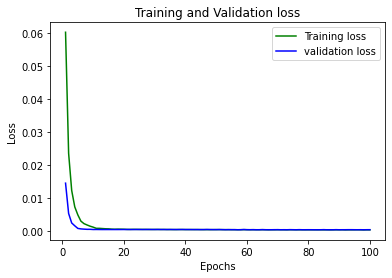

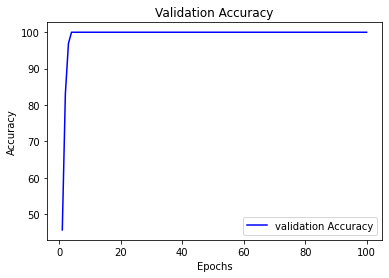

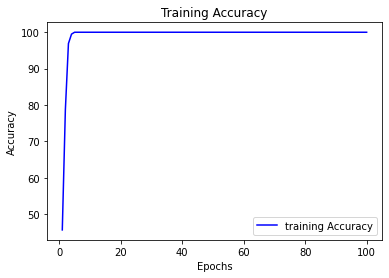

In [ ]:

makeGraph()

In [ ]:
#diagnostic plot

predicted, actual = runTest(deepModel, valLoader)

100.0
RMSE:  0.022490070801295822


In [ ]:
#diagnostic/residual plots

import matplotlib.pyplot as plt
import plotly.express as px

fig = px.scatter(x = predicted, y = actual, title = "Diagnostic Plot",trendline="ols", labels = {"x":"Predicted", "y":"Actual"})

fig.show()


In [ ]:
npActual = np.array(actual)
npPredicted = np.array(predicted)


fig = px.scatter(x = actual, y = np.subtract(npActual, npPredicted), title = "Residual Plot", trendline="ols", labels = {"x":"Actual","y":"Residual"})

fig.show()

In [ ]:
np.corrcoef(predicted,actual)

array([[1.        , 0.44077223],
       [0.44077223, 1.        ]])

In [ ]:
np.corrcoef(actual,np.subtract(npActual, npPredicted))

array([[1.       , 0.9371989],
       [0.9371989, 1.       ]])

In [ ]:
inputFeatures

['p_throws',
 'release_speed',
 'release_spin_rate',
 'release_extension',
 'pitch_type_CH',
 'pitch_type_CU',
 'pitch_type_FF',
 'pitch_type_SL',
 'pitch_type_other_offspeed',
 'zone_high_zone',
 'zone_low_zone']

In [ ]:
inputLabels = []

for index, i in enumerate(inputFeatures):
  if index == 1 or index == 2 or index == 3:
    inputLabels.append(i+"_5th")
    inputLabels.append(i+"_95th")
  else:
    inputLabels.append(i)

inputLabels.append("ballFrequency")
inputLabels.append("pitchTypeEntropy")

# inputLabels.append("WHIP")
#inputLabels.append("BAA")
#inputLabels.append("FIP")

print(inputLabels)

['p_throws', 'release_speed_5th', 'release_speed_95th', 'release_spin_rate_5th', 'release_spin_rate_95th', 'release_extension_5th', 'release_extension_95th', 'pitch_type_CH', 'pitch_type_CU', 'pitch_type_FF', 'pitch_type_SL', 'pitch_type_other_offspeed', 'zone_high_zone', 'zone_low_zone', 'ballFrequency', 'pitchTypeEntropy']


In [ ]:
#1d regression on every feature
#use inputFeatures
xTr = x[:,2]
xVl = xVal[:,2]

tData = PitcherDataset(xTr,y)
vData = PitcherDataset(xVl,yVal)
batch_size = 4
trainRegLoader = DataLoader(dataset = tData, batch_size = batch_size, shuffle = True)
valRegLoader = DataLoader(dataset = vData, batch_size = batch_size, shuffle = False)
print(tData.__getitem__(400))
print(vData.__getitem__(140))

(tensor([1.7220]), tensor([0.1993]))
(tensor([0.5194]), tensor([0.1606]))


In [ ]:
#running linear regression on each feature

# linearRegression = LinearReg(1,outputSize)
# runTrainVal(linearRegression,trainRegLoader,valRegLoader)

In [ ]:
# predicted, actual = runTest(linearRegression,valRegLoader)

In [ ]:
#diagnostic/residual plots

# import matplotlib.pyplot as plt
# import plotly.express as px

# fig = px.scatter(x = predicted, y = actual, trendline="ols")

# fig.show()


In [ ]:
# npActual = np.array(actual)
# npPredicted = np.array(predicted)


# fig = px.scatter(x = actual, y = np.subtract(npPredicted, npActual), trendline="ols")

# fig.show()

In [ ]:
# np.corrcoef(predicted,actual)

In [ ]:
# np.corrcoef(actual,np.subtract(npPredicted, npActual))

In [ ]:
#visualizing linear regression for each feature

In [ ]:
import plotly.express as px
import numpy as np
yValues = np.reshape(y,(-1))
yTemp = y
fig = px.scatter(x = xTr, y = yValues, trendline="ols")
y = yTemp
fig.show()

In [ ]:
for i in range(0,len(inputLabels)):
  xVals = xVal[:,i]
  yValues = np.reshape(yVal,(-1))
  yTemp = y
  fig = px.scatter(x = xVals, y = yValues, trendline="ols", labels={'x':inputLabels[i], 'y':'FIP'}, width = 800, height = 600)
  fig.update_layout(
    xaxis_title=inputLabels[i],
    yaxis_title='FIP',
    font=dict(
        family="Arial",
        size=16,
        color='#000000'
    )
  )
  y = yTemp
  fig.show()

In [ ]:
#correlation between balls and on base percentage

for index,col in enumerate(xVal[0]):
  if(abs(np.corrcoef(xVal[:,index],yValues)[0][1]) >= 0.1):
    print(np.corrcoef(xVal[:,index],yValues), index)

[[1.         0.14711446]
 [0.14711446 1.        ]] 0
[[ 1.         -0.19378987]
 [-0.19378987  1.        ]] 1
[[ 1.         -0.32076095]
 [-0.32076095  1.        ]] 2
[[ 1.         -0.23283518]
 [-0.23283518  1.        ]] 3
[[ 1.         -0.23881439]
 [-0.23881439  1.        ]] 4
[[ 1.         -0.15004946]
 [-0.15004946  1.        ]] 5
[[1.       0.194926]
 [0.194926 1.      ]] 7
[[1.         0.12081201]
 [0.12081201 1.        ]] 9
[[ 1.         -0.16333471]
 [-0.16333471  1.        ]] 10
[[ 1.         -0.10168159]
 [-0.10168159  1.        ]] 11
[[1.         0.14913495]
 [0.14913495 1.        ]] 14
[[1.         0.15742686]
 [0.15742686 1.        ]] 15


In [ ]:
#Calculate RMSE of each feature and SD
#it seems like ball freq RMSE is 0.02 better than SD, others are basically identical
#(actual, predicted)

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

#linear regression with balls frequency feature

RMSEVals = []


for i in range(0,len(inputLabels)):
  xTraining = x[:,i]
  yTraining = y
  xVals = xVal[:,i]
  yValues = np.reshape(yVal,(-1))

  XT = np.reshape(xTraining,((-1,1)))
  YT = np.reshape(yTraining,((-1,1)))

  X = np.reshape(xVals,((-1,1)))
  Y = np.reshape(yValues,((-1,1)))
  reg = LinearRegression().fit(XT, YT)

  yTemp = y
  RMSEVals.append(np.sqrt(mse(yValues,reg.predict(X))))
  print(np.sqrt(mse(yValues,reg.predict(X))), np.std(yValues))
  y = yTemp


0.024410559480900432 0.02451417483149903
0.0241535277382356 0.02451417483149903
0.02328631965250375 0.02451417483149903
0.023968677063780076 0.02451417483149903
0.0238736414185016 0.02451417483149903
0.024374047596236088 0.02451417483149903
0.02467127583181774 0.02451417483149903
0.02419285293165677 0.02451417483149903
0.02461715985364077 0.02451417483149903
0.024463562789900594 0.02451417483149903
0.024255948347052757 0.02451417483149903
0.024443935050661926 0.02451417483149903
0.02472121624770032 0.02451417483149903
0.024721216247700316 0.02451417483149903
0.02429701703849748 0.02451417483149903
0.02429698188515222 0.02451417483149903


In [ ]:
from sklearn.linear_model import LinearRegression

#linear regression with balls frequency feature


X = np.reshape(xTr,((-1,1)))
y = np.reshape(y,((-1,1)))

xVals = xVl
yValues = np.reshape(yVal,(-1))

XV = np.reshape(xVals,((-1,1)))
YV = np.reshape(yValues,((-1,1)))

reg = LinearRegression().fit(X, y)

pred = reg.predict(XV)

valid = 0
total = len(pred)
for index, val in enumerate(pred):
  if abs(YV[index]-val) < 0.017:
    print(val, YV[index])
    valid+=1

print(valid/total)

y = yTemp

[0.19220595] [0.19320594]
[0.19164766] [0.17808219]
[0.19555568] [0.19545455]
[0.1969514] [0.20025896]
[0.19192681] [0.20550162]
[0.19582086] [0.19251925]
[0.1989054] [0.19920319]
[0.19805402] [0.21262209]
[0.19388081] [0.18322296]
[0.19053109] [0.2028136]
[0.20030112] [0.19466248]
[0.18913537] [0.18760469]
[0.19471825] [0.19169811]
[0.18606478] [0.1903429]
[0.1989054] [0.20491803]
[0.19974284] [0.21103118]
[0.18801879] [0.1871714]
[0.19639311] [0.18829664]
[0.19025194] [0.19543974]
[0.19332253] [0.17662338]
[0.18662307] [0.17990919]
[0.18744655] [0.17955801]
[0.18773965] [0.20226843]
[0.19332253] [0.18727915]
[0.19946369] [0.19651741]
[0.19470429] [0.19234973]
[0.19330857] [0.18121693]
[0.19248509] [0.20935412]
[0.19555568] [0.20704846]
[0.18438992] [0.17754569]
[0.1899728] [0.19762846]
[0.18940055] [0.19933417]
[0.19806797] [0.20844327]
[0.19723054] [0.20382166]
[0.19164766] [0.1769958]
[0.19135456] [0.18530207]
[0.19723054] [0.2133995]
[0.19053109] [0.1928934]
[0.18801879] [0.187251

In [ ]:
#diagnostic plot of ballFreq linear regression
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.scatter(x = pred[:,0], y = YV[:,0], trendline="ols", labels={"x":"predicted","y":"actual"})

fig.show()


In [ ]:
#residual plot
npActual = np.array(YV[:,0])
npPredicted = np.array(pred[:,0])


fig = px.scatter(x = npActual, y = np.subtract(npActual, npPredicted), title = "Residual Plot", trendline="ols", labels={"x":"Actual", "y":"Residual"})

fig.show()

In [ ]:
np.corrcoef(npPredicted,npActual)

array([[1.        , 0.32076095],
       [0.32076095, 1.        ]])

In [ ]:
np.corrcoef(actual,np.subtract(npActual, npPredicted))

array([[1.        , 0.95819745],
       [0.95819745, 1.        ]])

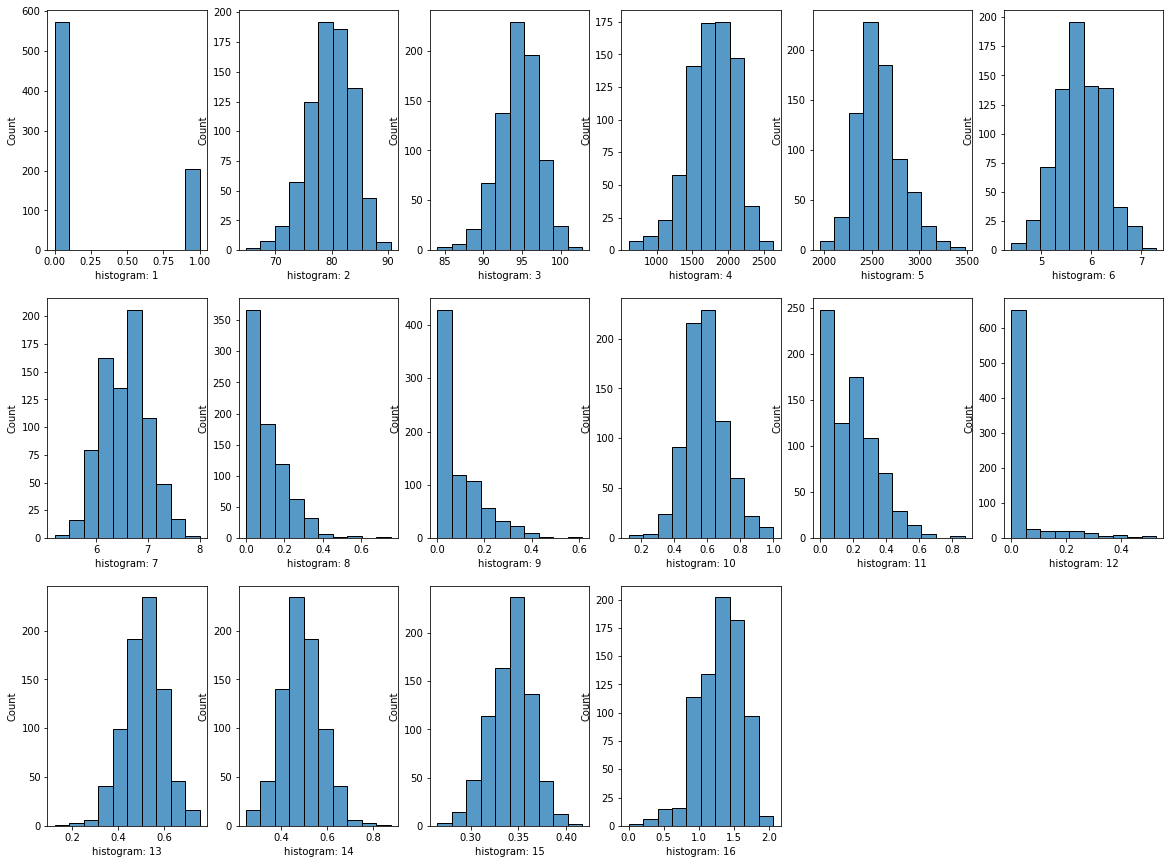

In [ ]:
#Histograms for each feature

#Plotting histograms
import matplotlib.pyplot as plt
import seaborn as sb 

fig = plt.figure(figsize = (20,15))

for i in range(len(x[0])):
  tempArr = x[:,i]
  tempVal = xVal[:,i]

  tempArr = np.concatenate((tempArr, tempVal), axis=0)
  plt.subplot(3,6,i + 1)
  sb.histplot(data=tempArr, bins = 10)
  plt.xlabel("histogram: " + str(i+1))

Text(0.5, 0, 'WHIP')

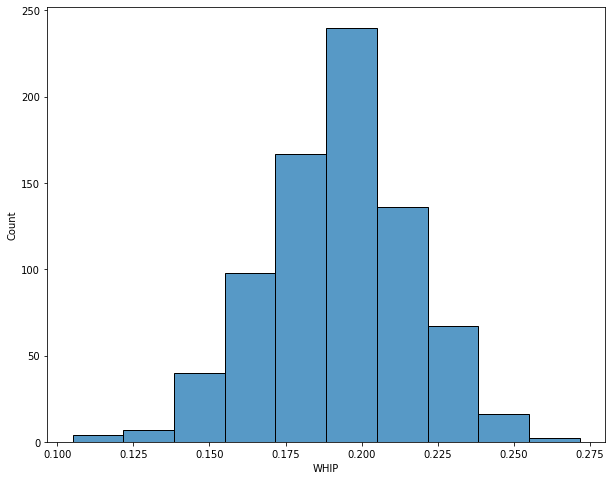

In [ ]:
fig = plt.figure(figsize = (10,8))

yTemp = np.reshape(y,-1)
yValTemp = np.reshape(yVal,-1)

outputs = np.concatenate((yTemp, yValTemp), axis=0)
sb.histplot(data=outputs, bins = 10)
plt.xlabel("WHIP")

In [ ]:
#Next steps, do entropy stuff (information entropy on each pitch type as a new feature)
#It seems like entropy doesn't add any usefullness in determing WHIP
from scipy import stats 
maxEnt = 0
minEnt = 5
for i in range(len(x)):
  if(stats.entropy([x[i][7],x[i][8],x[i][9],x[i][10],x[i][11]], base = 2) == 0):
    continue
  maxEnt = max(maxEnt,stats.entropy([x[i][7],x[i][8],x[i][9],x[i][10],x[i][11]], base = 2))
  minEnt = min(minEnt, stats.entropy([x[i][7],x[i][8],x[i][9],x[i][10],x[i][11]], base = 2))
print(maxEnt, minEnt)

1.881744651230212 0.1273125845791013


In [ ]:

#whipDict vs onBaseFreq

import plotly.express as px
import numpy as np

whipVals = []
BAAVals = []
for id in distinctValidationPitchers:
  whipVals.append(whipDict[id])
  BAAVals.append(onBaseFreq[id])

fig = px.scatter(x = whipVals, y = BAAVals, trendline="ols", labels = ({'x':'WHIP', 'y':'BAA'}), width = 800, height = 600)
fig.update_layout(
    xaxis_title='WHIP',
    yaxis_title='BAA',
    font=dict(
        family="Arial",
        size=16,
        color='#000000'
    )
  )
fig.show()

In [ ]:
print(np.corrcoef(whipVals,BAAVals))

[[1.         0.62418983]
 [0.62418983 1.        ]]


In [ ]:
#whipDict vs FIPDict

import plotly.express as px
import numpy as np

whipVals = []
FIPVals = []
for id in distinctValidationPitchers:
  whipVals.append(whipDict[id])
  FIPVals.append(FIPDict[id])

fig = px.scatter(x = whipVals, y = FIPVals, trendline="ols",labels = ({'x':'WHIP', 'y':'FIP'}))
fig.show()

In [ ]:
print(np.corrcoef(whipVals,FIPVals))

[[1.         0.31791669]
 [0.31791669 1.        ]]


In [ ]:
#BAADict vs FIPDict

import plotly.express as px
import numpy as np

BAAVals = []
FIPVals = []
for id in distinctValidationPitchers:
  BAAVals.append(onBaseFreq[id])
  FIPVals.append(FIPDict[id])

fig = px.scatter(x = BAAVals, y = FIPVals, trendline="ols", labels = ({'x':'BAA', 'y':'FIP'}))
fig.show()

In [ ]:
print(np.corrcoef(BAAVals,FIPVals))

[[1.         0.61465566]
 [0.61465566 1.        ]]


In [ ]:
#Next, run hypothesis tests on different features against each other
#Also try to add some of these featuers to neural network and see if it improves accuracy (these aren't physical features no more)

import numpy as np
import scipy.stats

#On Feature RMSE vs WHIP SD (Only ball frequency is statistically significant)

def f_test(group1, group2,var1,var2):
      f = var2/var1
      nun = group1.size-1
      dun = group2.size-1
      p_value = 1-scipy.stats.f.cdf(f, nun, dun)
      return f, p_value

for i in range(len(inputLabels)):
  arr1= np.array(xVal[:,i])
  arr2 = np.array(yValues)
    
  # calculate variance of each group
  var1 =  RMSEVals[i]**2
  var2 = np.var(arr2, ddof = 1)
    
  # print(var1,var2)
    
  # perform F-test (change output label depending on if testing WHIP, BAA, or FIP)
  print(inputLabels[i] + ", " + "WHIP")
  print("p-value: ", f_test(arr1, arr2,var1,var2)[1])
  print()
  print()

p_throws, WHIP
p-value:  0.4622845533686757


release_speed_5th, WHIP
p-value:  0.4044205881037717


release_speed_95th, WHIP
p-value:  0.22651508483192873


release_spin_rate_5th, WHIP
p-value:  0.363628218653389


release_spin_rate_95th, WHIP
p-value:  0.3430946849926071


release_extension_5th, WHIP
p-value:  0.45402378135112365


release_extension_95th, WHIP
p-value:  0.5211747274321237


pitch_type_CH, WHIP
p-value:  0.41321085069973584


pitch_type_CU, WHIP
p-value:  0.5089979191034495


pitch_type_FF, WHIP
p-value:  0.47428257970373755


pitch_type_SL, WHIP
p-value:  0.4273740775789767


pitch_type_other_offspeed, WHIP
p-value:  0.4698392930963825


zone_high_zone, WHIP
p-value:  0.5323710701255445


zone_low_zone, WHIP
p-value:  0.532371070125542


ballFrequency, WHIP
p-value:  0.43662486174807136


pitchTypeEntropy, WHIP
p-value:  0.43661693447476024




In [ ]:
arr1= np.array(FIPVals)
arr2 = np.array(whipVals)
#RMSE = sqrt(1-r^2)*SD

var1 =  (np.sqrt(1-np.corrcoef(arr1,arr2)[0][1]**2)*np.std(arr2,ddof = 1))**2
var2 = np.var(arr2, ddof = 1)

print("p-value for FIP vs WHIP: ", f_test(arr1, arr2,var1,var2)[1])

arr1= np.array(FIPVals)
arr2 = np.array(BAAVals)
#RMSE = sqrt(1-r^2)*SD

var1 =  (np.sqrt(1-np.corrcoef(arr1,arr2)[0][1]**2)*np.std(arr2,ddof = 1))**2
var2 = np.var(arr2, ddof = 1)

print("p-value for FIP vs BAA: ", f_test(arr1, arr2,var1,var2)[1])

arr1= np.array(BAAVals)
arr2 = np.array(whipVals)
#RMSE = sqrt(1-r^2)*SD

var1 =  (np.sqrt(1-np.corrcoef(arr1,arr2)[0][1]**2)*np.std(arr2,ddof = 1))**2
var2 = np.var(arr2, ddof = 1)

print("p-value for BAA vs WHIP: ", f_test(arr1, arr2,var1,var2)[1])


#Neural network f-test (predicted vs actual)

var1 = (np.sqrt(1-np.corrcoef(predicted,actual)[0][1]**2)*np.std(actual,ddof = 1))**2
var2 = np.var(actual, ddof = 1)

print("p-value for neural network: ", f_test(np.array(predicted), np.array(actual),var1,var2)[1])

p-value for FIP vs WHIP:  0.229373090324543
p-value for FIP vs BAA:  0.0005099821401074456
p-value for BAA vs WHIP:  0.00031732691093555587
p-value for neural network:  0.0666768471132908


In [ ]:
#predicting WHIP only using constant value
mean = sum(whipVals) / len(whipVals) 

print(mean)
ctr = 0

constantArr = []

for val in whipVals:
  if abs(mean - val) < 0.1:
    ctr+=1
  constantArr.append(mean)

print("Baseline accuracy: ", ctr * 100/len(whipVals))
print(np.sqrt(mse(whipVals,constantArr)))

1.13956321202222
Baseline accuracy:  48.205128205128204
0.1575449623659951


In [ ]:
#predicting BAA only using constant value
mean = sum(BAAVals) / len(BAAVals) 

print(mean)
ctr = 0

constantArr = []

for val in BAAVals:
  if abs(mean - val) < 0.017:
    ctr+=1
  constantArr.append(mean)

print("Baseline accuracy: ", ctr * 100/len(BAAVals))
print(np.sqrt(mse(BAAVals,constantArr)))

0.19094481228397078
Baseline accuracy:  52.82051282051282
0.02451417483149903


In [ ]:
#predicting FIP only using constant value
mean = sum(FIPVals) / len(FIPVals) 

print(mean)
ctr = 0

constantArr = []

for val in FIPVals:
  if abs(mean - val) < 0.56:
    ctr+=1
  constantArr.append(mean)

print("Baseline accuracy: ", ctr * 100/len(FIPVals))
print(np.sqrt(mse(FIPVals,constantArr)))

3.364930669539385
Baseline accuracy:  53.333333333333336
0.8561882456864452
